In [1]:
# importing the libraries
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
data=pd.read_csv(r'C:\Users\Admin\Desktop\it_VEDANT\My Learnbay Folder\My Learnbay Folder\Stat and ML by Utkarsha sir\ML_BY_ME\11th Feb 2023\Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
### here we will do the k means clustering based on annual income and Spending score
x= data.iloc[:,3:]

In [6]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
## we have to apply k means clustering

In [8]:
x['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [9]:
x['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

In [10]:
# without scaling we will try clustering
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)

In [11]:
y_pred=kmeans.fit_predict(x.values)

In [12]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [13]:
data1=data
data1['Cluster_type']=y_pred

In [14]:
data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_type
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


#### Now applying WCSS : Within Cluster Sum of Squares 


In [15]:
wcss=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)   # inertia==wcss
    

In [16]:
print(wcss)

[184102.1534926471, 106348.37306211122, 100690.18392190101, 44454.476479679724, 38858.959975143895, 35079.50456270781, 25095.70320999756, 23227.51344806955]


In [17]:
# _inertia : it will return the wcss

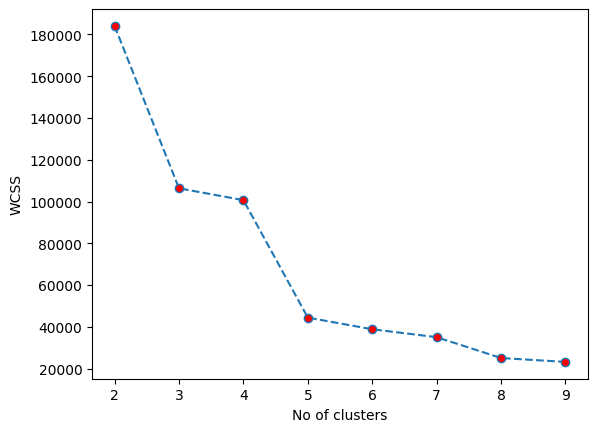

In [18]:
## To plot the graph of k value vs wcss ie elbow curve
lst=[i for i in range(2,10)]  # no of clusters
plt.figure()
plt.plot(lst,wcss,marker='o',mfc='red',linestyle='--')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()


In [19]:
## From this we can observe that after k=5 wcss is not decreasing much
## and so we can take k=5 as optimal no of clusters

In [20]:
kmeans=KMeans(n_clusters=5)
y_pred_clusters=kmeans.fit_predict(x.values)

In [21]:
new_data=data
new_data['Cluster Label']=y_pred_clusters

In [22]:
new_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_type,Cluster Label
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,1
196,197,Female,45,126,28,2,4
197,198,Male,32,126,74,3,1
198,199,Male,32,137,18,2,4


#### Visualizing the clusters

In [23]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0, 0.5, 'Spending Score (1-100)')

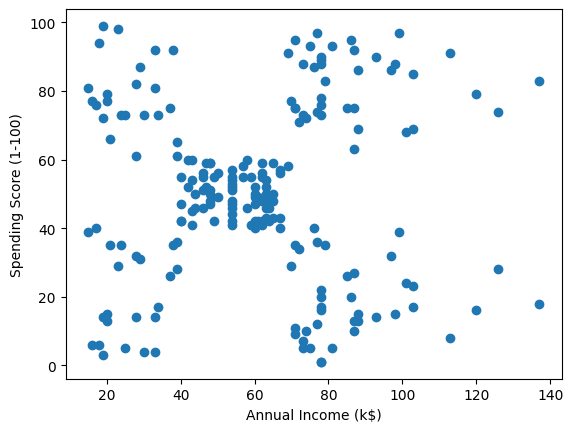

In [24]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [25]:
x[y_pred_clusters==0]['Annual Income (k$)']

1     15
3     16
5     17
7     18
9     19
11    19
13    20
15    20
17    21
19    23
21    24
23    25
25    28
27    28
29    29
31    30
33    33
35    33
37    34
39    37
41    38
45    39
Name: Annual Income (k$), dtype: int64

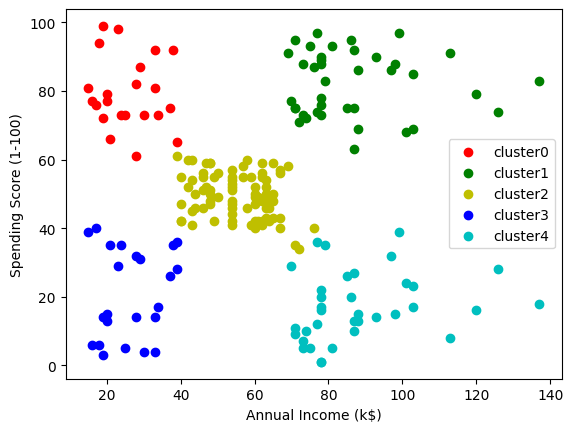

In [26]:
plt.scatter(x[y_pred_clusters==0]['Annual Income (k$)'],x[y_pred_clusters==0]['Spending Score (1-100)'],color='r',label='cluster0')
plt.scatter(x[y_pred_clusters==1]['Annual Income (k$)'],x[y_pred_clusters==1]['Spending Score (1-100)'],color='g',label='cluster1')
plt.scatter(x[y_pred_clusters==2]['Annual Income (k$)'],x[y_pred_clusters==2]['Spending Score (1-100)'],color='y',label='cluster2')
plt.scatter(x[y_pred_clusters==3]['Annual Income (k$)'],x[y_pred_clusters==3]['Spending Score (1-100)'],color='b',label='cluster3')
plt.scatter(x[y_pred_clusters==4]['Annual Income (k$)'],x[y_pred_clusters==4]['Spending Score (1-100)'],color='c',label='cluster4')
plt.legend()
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

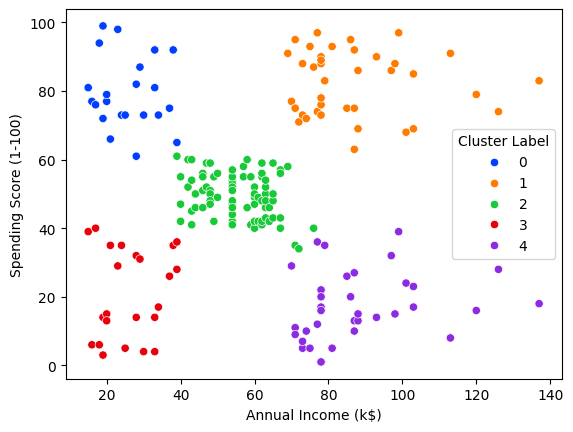

In [27]:
## 
sns.scatterplot(data=new_data,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster Label',palette='bright')

In [28]:
### THis compltes K means clustering

## Hierarchical Clustering

In [29]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_type,Cluster Label
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,3


In [32]:
data_hie=data.drop(['Cluster_type','Cluster Label'],axis=1)

In [33]:
data_hie.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
X=data_hie[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [37]:
import scipy.cluster.hierarchy as sch

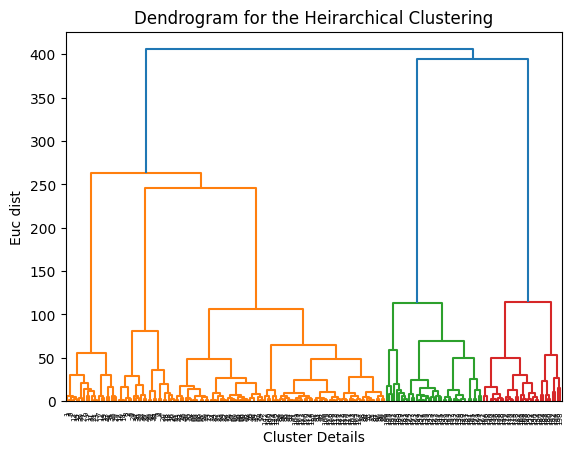

In [40]:
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram for the Heirarchical Clustering')
plt.xlabel('Cluster Details')
plt.ylabel('Euc dist')
plt.show()

In [ ]:
### From the above deendrogram we can consider 5 clusters

In [42]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')

In [44]:
y_pred_hc=hc.fit_predict(X)
y_pred_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [45]:
data_hie['Cluster']=y_pred_hc

In [46]:
data_hie

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

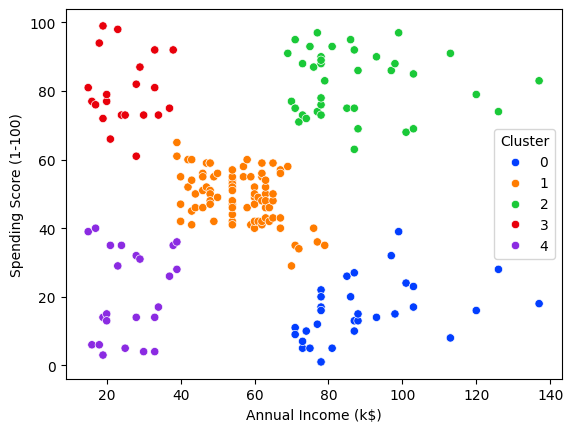

In [48]:
sns.scatterplot(data=data_hie,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',palette='bright')